# Viagem 

## Etapas:

 Passo 1: Entender os dados (as informações que eles querem passar)<br>
 passo 2: Verificar se a tabela está boas condições para tirar as informações<br>
 passo 3: Fazer pequenas anotações dos dados<br>
 passo 4: Exploração com grãficos<br>
 passo 5: resumo final com informações da análise

In [1]:
# bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('flights.csv')
df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [4]:
# excluindo colunas sem informações importantes
df = df.drop(['travelCode', 'userCode'], axis=1)

In [5]:
# criando coluna month
df['month'] = df['date'].str[:2]
df.head()

,from,to,flightType,price,time,distance,agency,date,month
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,09
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,09
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,10
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,10
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,10


In [6]:
# df = df.rename(columns={'from':'origem', 'to':'destino', 'price':'preco', 'time':'tempo', 'flightType':'tipo_de_voo', 'distance':'distancia',
#                'agency':'agencia', 'date':'data', 'month':'mes'})

In [7]:
# df.head()

In [8]:
# df['data'] = pd.to_datetime(df['data'])

In [9]:
# df.info()

In [10]:
df['month'] = df['month'].sort_values(ascending=True)

In [11]:
df['flightType'].value_counts(normalize=True).map('{:.1%}'.format)

firstClass    42.8%
premium       28.7%
economic      28.5%
Name: flightType, dtype: object

In [12]:
df['month'].value_counts()

10    28980
12    26346
11    25764
01    25587
03    22741
04    22607
02    22387
05    20968
07    20113
09    19468
06    19061
08    17866
Name: month, dtype: int64

In [13]:
distancia = df[['to', 'distance']].groupby(['to']).sum()
distancia

,distance
to,
Aracaju (SE),2.156430e+07
Brasilia (DF),1.329986e+07
Campo Grande (MS),1.666786e+07
Florianopolis (SC),3.851577e+07
Natal (RN),1.046009e+07
Recife (PE),1.648266e+07
Rio de Janeiro (RJ),9.260348e+06
Salvador (BH),1.312948e+07
Sao Paulo (SP),9.330273e+06


In [14]:
# desincia percorrida por mes: Outubro
distancia = df[['distance', 'month']].groupby(['month']).sum()
distancia

,distance
month,
01,1.391138e+07
02,1.225976e+07
03,1.245824e+07
04,1.237290e+07
05,1.148928e+07
06,1.046268e+07
07,1.103239e+07
08,9.740708e+06
09,1.062955e+07


In [15]:
df['month'].value_counts()

10    28980
12    26346
11    25764
01    25587
03    22741
04    22607
02    22387
05    20968
07    20113
09    19468
06    19061
08    17866
Name: month, dtype: int64

In [16]:
distancia = df[['to', 'distance']].groupby(['to']).sum()
distancia

,distance
to,
Aracaju (SE),2.156430e+07
Brasilia (DF),1.329986e+07
Campo Grande (MS),1.666786e+07
Florianopolis (SC),3.851577e+07
Natal (RN),1.046009e+07
Recife (PE),1.648266e+07
Rio de Janeiro (RJ),9.260348e+06
Salvador (BH),1.312948e+07
Sao Paulo (SP),9.330273e+06


<AxesSubplot:xlabel='to', ylabel='distance'>

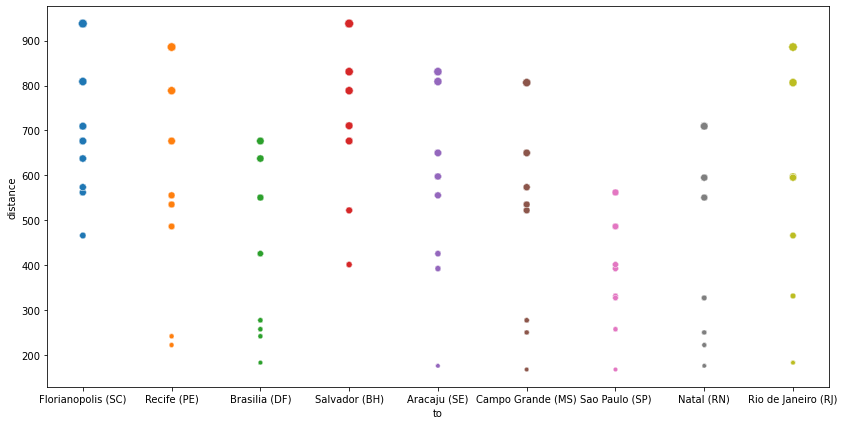

In [17]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x=df['to'], y='distance', hue='to', legend=False, size='distance')

<AxesSubplot:xlabel='distance', ylabel='price'>

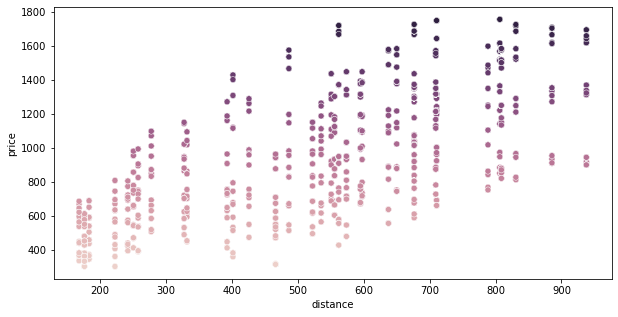

In [18]:
# grafigo mostrando relaçao ente distancia e preço
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='distance', y='price', hue='price', legend=False)

<AxesSubplot:xlabel='price', ylabel='time'>

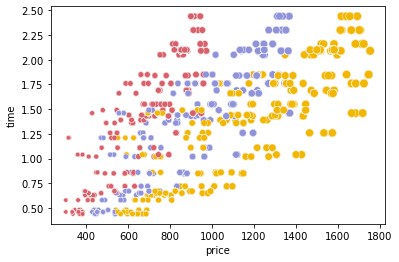

In [3]:
sns.scatterplot(data=df, x='price',
                y='time',
                hue='flightType',
                palette=['#F2B705', '#D95F69', '#8F93D9'],
                size='price',
                legend=False
                )


<AxesSubplot:xlabel='distance', ylabel='price'>

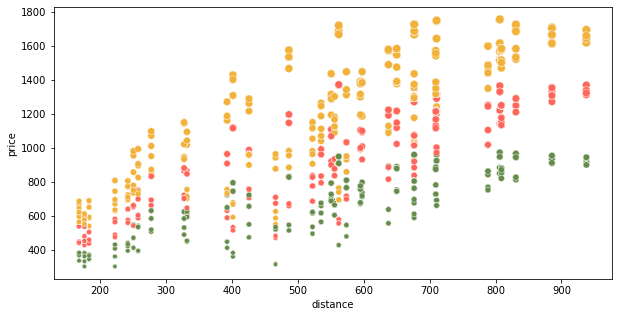

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='distance', y='price', hue='flightType', palette=['#F2B138', '#668C4A', '#FF665A'], size='price', legend=False)

<AxesSubplot:xlabel='month', ylabel='distance'>

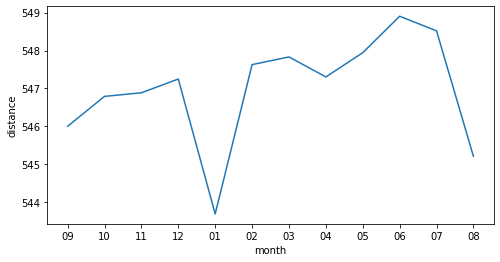

In [22]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='month', y='distance', ci=None)

<AxesSubplot:xlabel='distance', ylabel='to'>

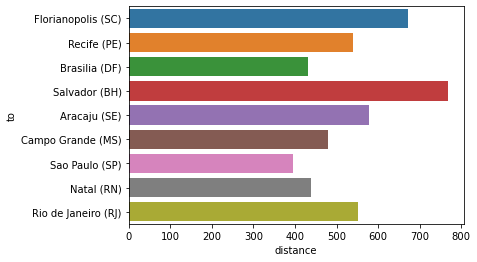

In [344]:
sns.barplot(data=df, x='distance', y='to', ci=None)

<AxesSubplot:xlabel='price', ylabel='flightType'>

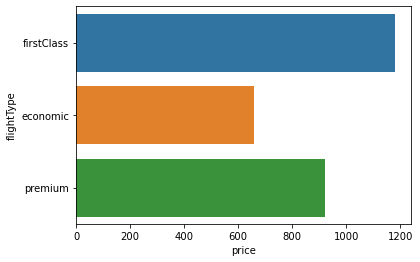

In [345]:
# firstClass possui o maior preço de suas passgens
sns.barplot(data=df, x='price', y='flightType', ci=None)

<AxesSubplot:xlabel='agency', ylabel='price'>

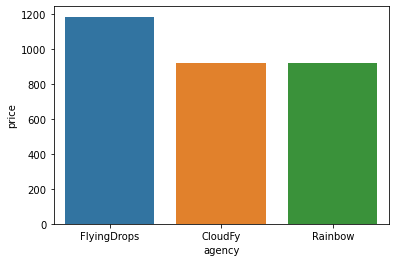

In [346]:
# A agencia FlyingDrops possui o maior valor das suas passagen em comparação com as outras agencias
sns.barplot(data=df, x='agency', y='price', ci=None)

In [347]:
distancia_regiao = df.groupby('to').agg({'distance':'sum'}).sort_values('distance', ascending = False).reset_index()

In [348]:
distancia_regiao

,to,distance
0,Florianopolis (SC),3.851577e+07
1,Aracaju (SE),2.156430e+07
2,Campo Grande (MS),1.666786e+07
3,Recife (PE),1.648266e+07
4,Brasilia (DF),1.329986e+07
5,Salvador (BH),1.312948e+07
6,Natal (RN),1.046009e+07
7,Sao Paulo (SP),9.330273e+06
8,Rio de Janeiro (RJ),9.260348e+06


<AxesSubplot:xlabel='distance', ylabel='to'>

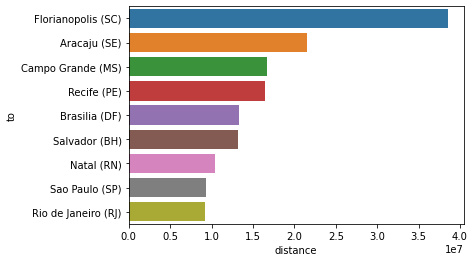

In [349]:
# Comparação entre destino e distancia o grafico de baixo igual
# grande destaque para Florianopolis
sns.barplot(y=distancia_regiao['to'], x=distancia_regiao['distance'])

In [350]:
# groupby: preço total com o os valores voos e destino
total_regiao = df.groupby('to').agg({'price':'sum'}).sort_values('price', ascending = False).reset_index()

In [351]:
total_regiao

,to,price
0,Florianopolis (SC),6.795997e+07
1,Aracaju (SE),3.965263e+07
2,Campo Grande (MS),2.923538e+07
3,Recife (PE),2.899354e+07
4,Brasilia (DF),2.359998e+07
5,Salvador (BH),2.162551e+07
6,Natal (RN),1.967624e+07
7,Sao Paulo (SP),1.531709e+07
8,Rio de Janeiro (RJ),1.423844e+07


<AxesSubplot:xlabel='price', ylabel='to'>

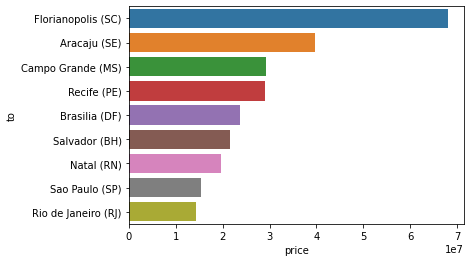

In [352]:
sns.barplot(y=total_regiao['to'], x=total_regiao['price'])

### Qual mês teve o maior faturamento com viagens?

In [353]:
# groupby mês x preço
total_mes = df.groupby('month').agg({'price':'sum'}).sort_values('price', ascending = False).reset_index()

In [354]:
total_mes

,month,price
0,10,2.766304e+07
1,12,2.519702e+07
2,11,2.467233e+07
3,01,2.433401e+07
4,03,2.182045e+07
5,04,2.159983e+07
6,02,2.145515e+07
7,05,2.018524e+07
8,07,1.933508e+07
9,09,1.856591e+07


<AxesSubplot:xlabel='price', ylabel='month'>

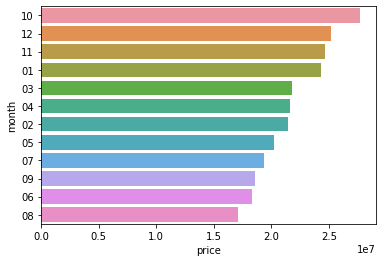

In [355]:
# Faturamento pór mês: O mês de outubro teve o maior faturamento com viagens
sns.barplot(y=total_mes['month'], x=total_mes['price'])

In [20]:
# conferindo
df.groupby(['month']).agg({'price':'sum'}).sort_values(by='price', ascending=False)

,price
month,
10,2.766304e+07
12,2.519702e+07
11,2.467233e+07
01,2.433401e+07
03,2.182045e+07
04,2.159983e+07
02,2.145515e+07
05,2.018524e+07
07,1.933508e+07


In [16]:
df.groupby(['flightType']).agg({'price':'sum'})

,price
flightType,
economic,5.100695e+07
firstClass,1.374975e+08
premium,7.179429e+07


In [17]:
df.groupby(['agency']).agg({'price':'sum'})

,price
agency,
CloudFy,1.069393e+08
FlyingDrops,4.597320e+07
Rainbow,1.073862e+08


### perguntas

Quais as regiões foram mais visitadas por durante o ano?

Qual e o período que as agencias mais faturam?

Qual é a epoca do ano que as regioes mais recebem visitas?

Primeira Classe é caro mesmo?

Turismo

Qual é a epoca do ano que ocorrem mais viagens? 

Verão? Ferias? Final de Ano?

In [ ]:
# A maioria dos passageiros optaram  viajar para  Florianopolis , seguido de Aracaju e Campo Grande 
# clase firstClass e escolheram a agencia FlyingDrops
# o periodo do ano em que mais ocorerram viajens foi Outubro, Dezembro e Novembro (final de ano)
# O mês em que as agencias mais faturaram foi foi o periode de Outubro a Janeiro
# e as regiões foram mais visitadas foram floripa e aracaju